<b>Problem:</b>
<p>Astronauts on the International Space Station have managed to decode an image obtained from radio signals in space. It is believed that the information comes from a distant galaxy where there is a planet with conditions for life. NASA has hired you (as an expert in image processing) so you decipher what the image means:</p>
<img align="left" width="20%" src="images/incognita1.jpg">

<b>Add Required Packages:</b>

In [ ]:
Pkg.add("Images")
Pkg.add("ImageMagick")
Pkg.add("ImageView")
Pkg.add("FixedPointNumbers")
Pkg.add("PyPlot")

Pkg.update()

<b>Execution:</b>

INFO: Precompiling module PyPlot...
INFO: Recompiling stale cache file /home/ec2-user/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/ec2-user/.julia/lib/v0.4/ImageMagick.ji for module ImageMagick.


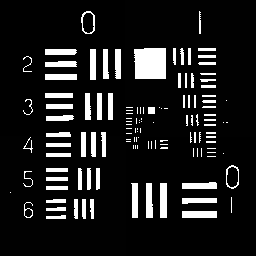

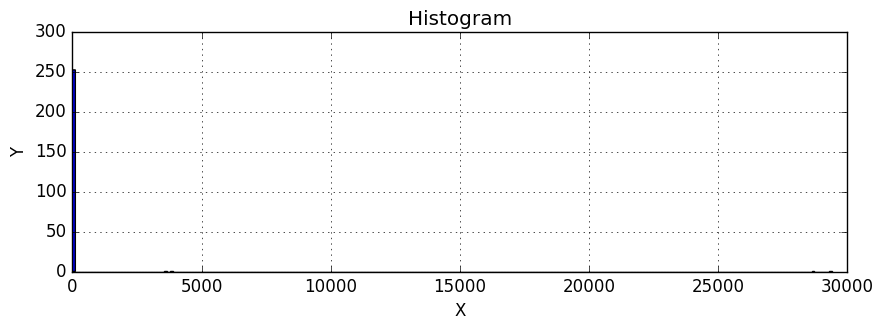

In [2]:
using Images, Colors, FixedPointNumbers, ImageView, PyPlot

#Adquire Raw Matrix from Image
binImage=convert(Image{Gray},load("images/incognita1.tif"))
grayImage=raw(binImage)

#Convert Image to Gray and then return a Array{Int32} object
imgMatrix = convert(Array{Int32},grayImage)

#Get matrix size
cols,rows=size(imgMatrix)

#Calculate histogram
histogram=zeros(256)

for i=1:rows
    for j=1:cols
        histogram[imgMatrix[j,i]+1]=histogram[imgMatrix[j,i]+1]+1
    end
end

#Plot the image Hisogram
nbins=256
x=histogram

fig = figure("pyplot_histogram",figsize=(10,3)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](x,nbins) # Histogram

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")

#After Ploting the image histogram we remove maximun values 

for i=1:rows
    for j=1:cols
        if imgMatrix[j,i]==255
            imgMatrix[j,i]=0
        else
            if imgMatrix[j,i]==0
                imgMatrix[j,i]=255
            end
        end
    end
end

imgOut = convert(Array{UInt8,2},imgMatrix)
imgOut = grayim(imgOut)

#Display new image and histogram
display(imgOut)

